In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import matplotlib.pyplot as plt

In [5]:
conditions = [(df['Species'] == 'Iris-setosa'),(df['Species']=='Iris-versicolor'),(df['Species'] == 'Iris-virginica')]

In [6]:
values = ['red','green','blue']

In [7]:
df['color_marker'] = np.select(conditions,values)

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,color_marker
0,1,5.1,3.5,1.4,0.2,Iris-setosa,red
1,2,4.9,3.0,1.4,0.2,Iris-setosa,red
2,3,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,147,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,148,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,149,6.2,3.4,5.4,2.3,Iris-virginica,blue


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

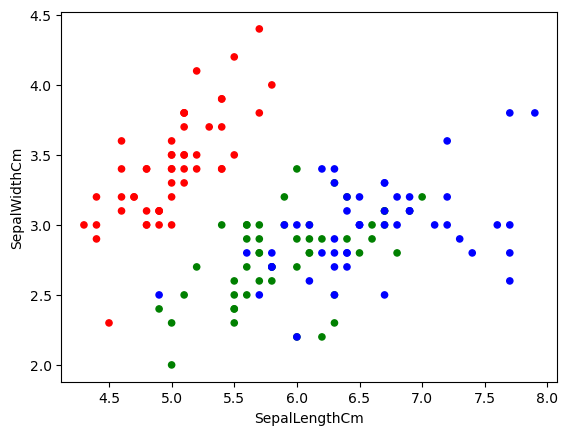

In [9]:
df.plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color=df['color_marker'])

In [10]:
import seaborn as sns

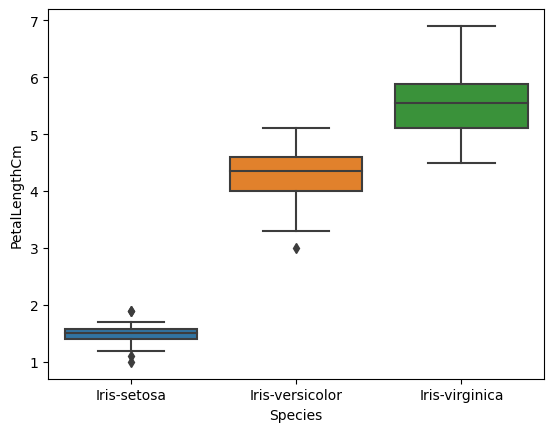

In [11]:
sns.boxplot(x='Species',y='PetalLengthCm',data = df)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

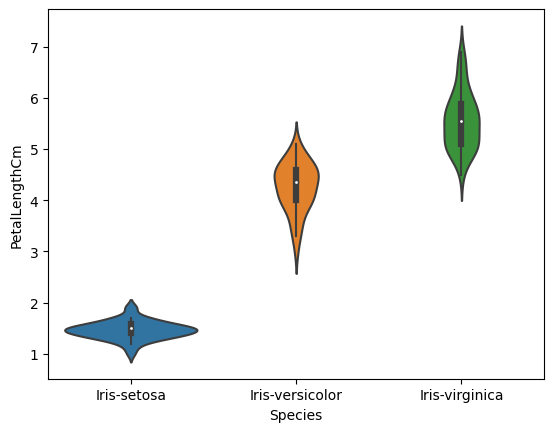

In [12]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

In [13]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\Umadevi Hiremath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


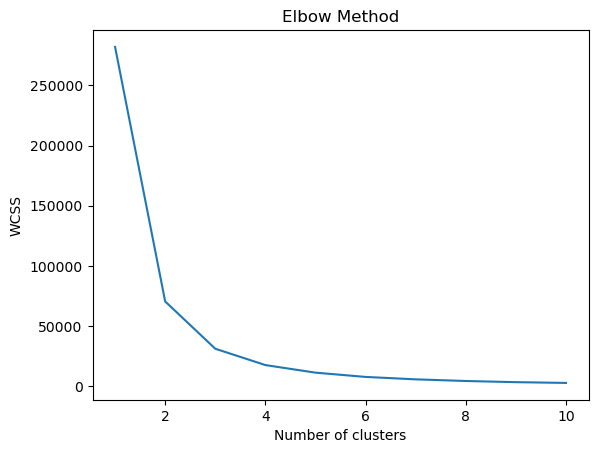

In [14]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = kmeans.fit_predict(x)

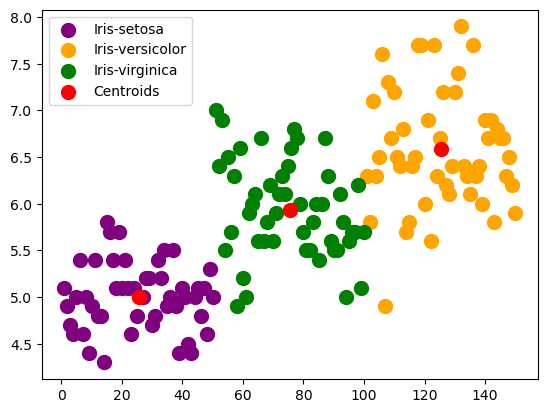

In [18]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='purple',label='Iris-setosa')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='orange',label='Iris-versicolor')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()